### Necessary Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
lsh_data = pd.read_csv("./lsh-results/final-results.csv")
cosine_sim_data = pd.read_csv("./knn-results/cosine-results.csv")
euclidean_sim = pd.read_csv("./knn-results/cosine-results.csv")
jaccard_sim = pd.read_csv("./knn-results/cosine-results.csv")

### LSH results plots

In [8]:
lsh_data.head()

,nbits,test_images,random_images_sim,time,output_indices,number_of_similar_images
0,5.0,/Users/abhishekvaidyanathan/Downloads/geologic...,0.969417,0.000351,"[0, 2, 3, 5, 6, 7, 8, 9, 10, 11]",10
1,10.0,/Users/abhishekvaidyanathan/Downloads/geologic...,0.988361,0.000251,"[1157, 1488, 2502, 4281, 4485, 4737, 5004, 501...",10
2,15.0,/Users/abhishekvaidyanathan/Downloads/geologic...,0.974686,0.008529,"[0, 1, 2, 3, 7, 8, 9, 11, 12, 13]",10
3,20.0,/Users/abhishekvaidyanathan/Downloads/geologic...,0.977878,0.404396,"[0, 1, 2, 6, 7, 8, 11, 12, 13, 16]",10
4,5.0,/Users/abhishekvaidyanathan/Downloads/geologic...,0.968108,0.000331,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",20


In [9]:
lsh_data_50 = lsh_data[lsh_data['number_of_similar_images']==50]
lsh_data_40 = lsh_data[lsh_data['number_of_similar_images']==40]
lsh_data_30 = lsh_data[lsh_data['number_of_similar_images']==30]
lsh_data_20 = lsh_data[lsh_data['number_of_similar_images']==20]
lsh_data_10 = lsh_data[lsh_data['number_of_similar_images']==10]

In [13]:
lsh_data_50_5_nbits = lsh_data_50[lsh_data_50['nbits']==5]
lsh_data_50_10_nbits = lsh_data_50[lsh_data_50['nbits']==10]
lsh_data_50_15_nbits = lsh_data_50[lsh_data_50['nbits']==15]
lsh_data_50_20_nbits = lsh_data_50[lsh_data_50['nbits']==20]

In [18]:
lsh_data_50_5_nbits.head()

,nbits,test_images,random_images_sim,time,output_indices,number_of_similar_images
16,5.0,/Users/abhishekvaidyanathan/Downloads/geologic...,0.960049,0.000237,"[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 15...",50
36,5.0,/Users/abhishekvaidyanathan/Downloads/geologic...,0.974270,0.000326,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",50
56,5.0,/Users/abhishekvaidyanathan/Downloads/geologic...,0.969417,0.000236,"[0, 1, 7, 9, 10, 11, 15, 16, 19, 20, 24, 26, 2...",50
76,5.0,/Users/abhishekvaidyanathan/Downloads/geologic...,0.974665,0.000235,"[0, 2, 6, 7, 8, 12, 13, 14, 15, 16, 17, 18, 20...",50
96,5.0,/Users/abhishekvaidyanathan/Downloads/geologic...,0.986893,0.000291,"[1, 2, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17, 20...",50


In [37]:
data_list = [lsh_data_50,lsh_data_40,lsh_data_30,lsh_data_20,lsh_data_10]
nbits = [5,10,15,20]
kNearest = [50,40,30,20,10]
combined = pd.DataFrame({
        'kNearest': [0],
        'nbits':[0],
        'average_sim': [0],
        'average_sim': [0]
    })
for data in range(len(data_list)):
    for nbit in nbits:
        dataset = data_list[data][data_list[data]['nbits']==nbit]
        avergae_sim = dataset['random_images_sim'].mean()
        average_time_for_each_image = dataset['time'].mean()
        kNearest_value = kNearest[data]
        combined = combined.append(pd.DataFrame({
            'kNearest' : [kNearest_value],
            'nbits' : [nbit],
            'average_sim': [avergae_sim],
            'average_time': [average_time_for_each_image]
            }), ignore_index=True)

In [41]:
combined = combined.iloc[1: , :]

In [42]:
combined.head()

,kNearest,nbits,average_sim,average_time
1,50,5,0.973173,0.000306
2,50,10,0.976456,0.000380
3,50,15,0.980298,0.008862
4,50,20,0.981321,0.406010
5,40,5,0.975154,0.000299


In [112]:
combined_5 = combined[combined['nbits']==5]
combined_10 = combined[combined['nbits']==10]
combined_15 = combined[combined['nbits']==15]
combined_20 = combined[combined['nbits']==20]

In [113]:
combined_10

,kNearest,nbits,average_sim,average_time
2,50,10,0.976456,0.000380
6,40,10,0.977130,0.000386
10,30,10,0.977787,0.000454
14,20,10,0.979466,0.000409
18,10,10,0.978243,0.000374


In [125]:
dummy_array = combined_10['kNearest']
list(dummy_array).reverse()

In [127]:
dummy_array = list(dummy_array)
dummy_array.reverse()

#### Average similarity and time plots

<Figure size 432x288 with 0 Axes>

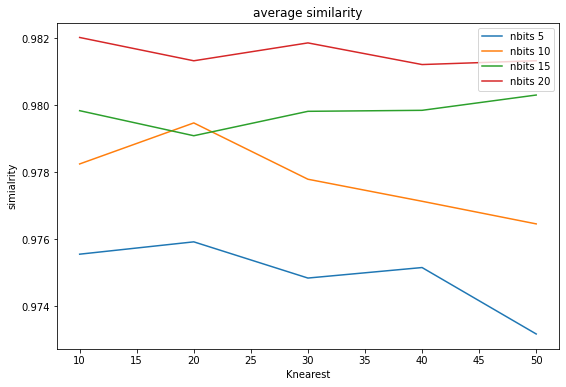

In [143]:
plt.figure(1)
fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(0, 50, 10)
ax.plot(combined_5['kNearest'],combined_5['average_sim'])
ax.plot(combined_10['kNearest'],combined_10['average_sim'])
ax.plot(combined_15['kNearest'],combined_15['average_sim'])
ax.plot(combined_20['kNearest'],combined_20['average_sim'])
plt.title('average similarity')
plt.ylabel('simialrity')
plt.xlabel('Knearest')
plt.legend(['nbits 5', 'nbits 10','nbits 15','nbits 20'], loc='upper right')
plt.show()

<Figure size 432x288 with 0 Axes>

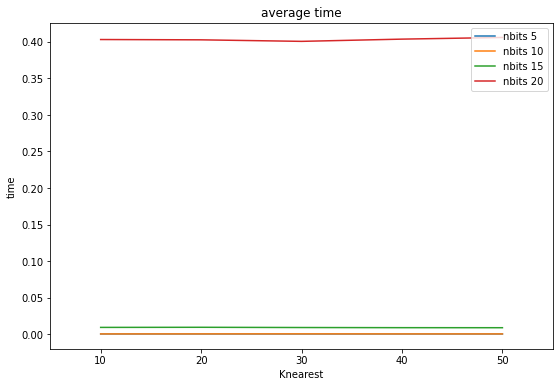

In [72]:
plt.figure(1)
fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(0, 50, 10)
ax.plot(combined['kNearest'].unique(),combined_5['average_time'])
ax.plot(combined['kNearest'].unique(),combined_10['average_time'])
ax.plot(combined['kNearest'].unique(),combined_15['average_time'])
ax.plot(combined['kNearest'].unique(),combined_20['average_time'])
plt.title('average time')
plt.ylabel('time')
plt.xlabel('Knearest')
plt.xlim([5, 55])
plt.legend(['nbits 5', 'nbits 10','nbits 15','nbits 20'], loc='upper right')
plt.show()

#### Average similarity and time for each nbit(hyperplane)

<Figure size 432x288 with 0 Axes>

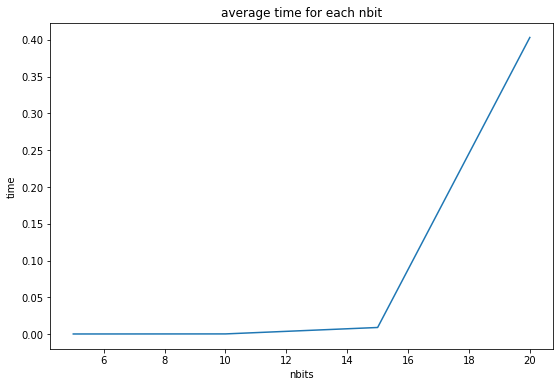

In [74]:
plt.figure(1)
fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(0, 50, 10)
average_time_array = [combined_5['average_time'].mean(),combined_10['average_time'].mean(),combined_15['average_time'].mean(),combined_20['average_time'].mean()]
ax.plot(combined['nbits'].unique(),average_time_array)
plt.title('average time for each nbit')
plt.ylabel('time')
plt.xlabel('nbits')
# plt.xlim([5, 55])
# plt.legend(['nbits 5', 'nbits 10','nbits 15','nbits 20'], loc='upper right')
plt.show()

<Figure size 432x288 with 0 Axes>

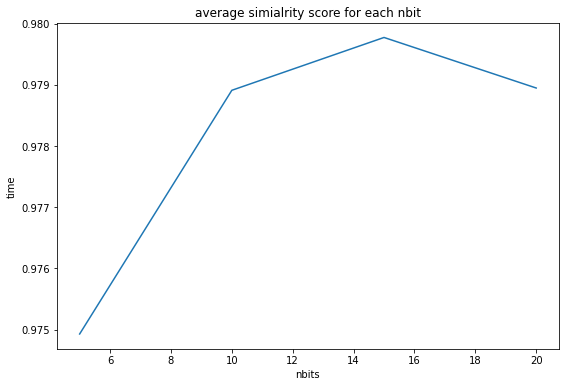

In [106]:
plt.figure(1)
fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(0, 50, 10)
average_time_array = [combined_5['average_sim'].mean(),combined_10['average_sim'].mean(),combined_15['average_sim'].mean(),combined_20['average_sim'].mean()]
ax.plot(combined['nbits'].unique(),average_time_array)
plt.title('average simialrity score for each nbit')
plt.ylabel('time')
plt.xlabel('nbits')
# plt.xlim([5, 55])
# plt.legend(['nbits 5', 'nbits 10','nbits 15','nbits 20'], loc='upper right')
plt.show()

#### Average similarity and time for each top K

<Figure size 432x288 with 0 Axes>

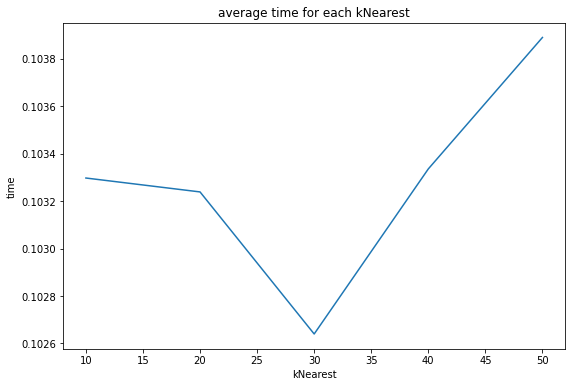

In [104]:
plt.figure(1)
fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(0, 50, 10)
average_time_array = [combined_10['average_time'].mean(),combined_20['average_time'].mean(),combined_30['average_time'].mean(),combined_40['average_time'].mean(),combined_50['average_time'].mean()]
ax.plot(combined_list,average_time_array)
# ax.plot(knn_results_data['kNearest'],knn_results_data['time_taken'])
plt.title('average time for each kNearest')
plt.ylabel('time')
plt.xlabel('kNearest')
# plt.legend(['lsh results','knn results'], loc='upper right')
plt.show()

<Figure size 432x288 with 0 Axes>

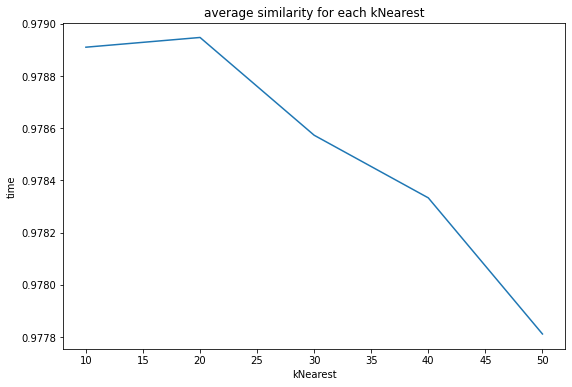

In [108]:
plt.figure(1)
fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(0, 50, 10)
average_time_array = [combined_10['average_sim'].mean(),combined_20['average_sim'].mean(),combined_30['average_sim'].mean(),combined_40['average_sim'].mean(),combined_50['average_sim'].mean()]
ax.plot(combined_list,average_time_array)
# ax.plot(knn_results_data['kNearest'],knn_results_data['time_taken'])
plt.title('average similarity for each kNearest')
plt.ylabel('time')
plt.xlabel('kNearest')
# plt.legend(['lsh results','knn results'], loc='upper right')
plt.show()

### KNN comparison with LSH

In [85]:
knn_results_data = pd.DataFrame()

In [86]:
knn_results_data["kNearest"] = [10,20,30,40,50] 
knn_results_data['time_taken'] = [0.0792,0.0714,0.0728,0.0740,0.0741]

<Figure size 432x288 with 0 Axes>

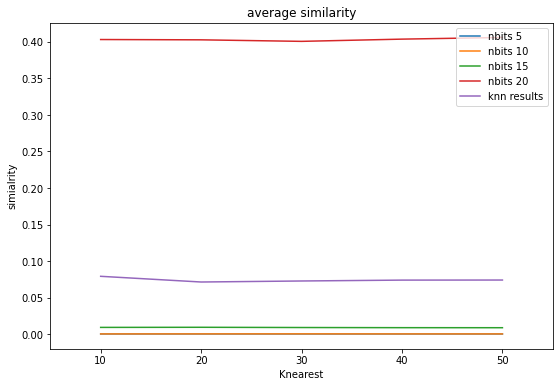

In [91]:
plt.figure(1)
fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(0, 50, 10)
ax.plot(combined['kNearest'].unique(),combined_5['average_time'])
ax.plot(combined['kNearest'].unique(),combined_10['average_time'])
ax.plot(combined['kNearest'].unique(),combined_15['average_time'])
ax.plot(combined['kNearest'].unique(),combined_20['average_time'])
ax.plot(knn_results_data['kNearest'],knn_results_data['time_taken'])
plt.title('average similarity')
plt.ylabel('simialrity')
plt.xlabel('Knearest')
plt.xlim([5, 55])
plt.legend(['nbits 5', 'nbits 10','nbits 15','nbits 20','knn results'], loc='upper right')
plt.show()

In [92]:
combined_50 = combined[combined['kNearest']==50]
combined_40 = combined[combined['kNearest']==40]
combined_30 = combined[combined['kNearest']==30]
combined_20 = combined[combined['kNearest']==20]
combined_10 = combined[combined['kNearest']==10]


In [93]:
combined_50

,kNearest,nbits,average_sim,average_time
1,50,5,0.973173,0.000306
2,50,10,0.976456,0.000380
3,50,15,0.980298,0.008862
4,50,20,0.981321,0.406010


In [98]:
combined_list = list(combined['kNearest'].unique())
combined_list.reverse()

In [99]:
combined_list

[10, 20, 30, 40, 50]

<Figure size 432x288 with 0 Axes>

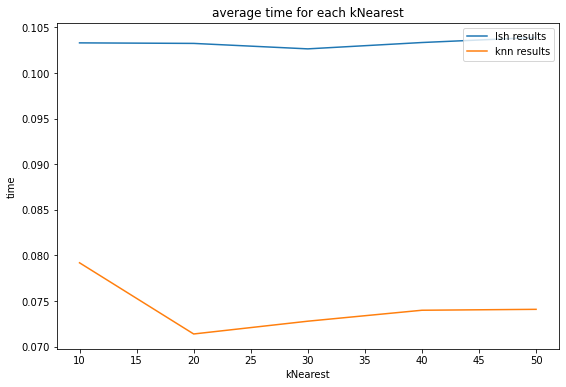

In [103]:
plt.figure(1)
fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(0, 50, 10)
average_time_array = [combined_10['average_time'].mean(),combined_20['average_time'].mean(),combined_30['average_time'].mean(),combined_40['average_time'].mean(),combined_50['average_time'].mean()]
ax.plot(combined_list,average_time_array)
ax.plot(knn_results_data['kNearest'],knn_results_data['time_taken'])
plt.title('average time for each kNearest')
plt.ylabel('time')
plt.xlabel('kNearest')
plt.legend(['lsh results','knn results'], loc='upper right')
plt.show()

### FAISS result plots

In [219]:
faiss_ip = pd.read_csv("./faiss-results/IP-faiss.csv")
faiss_l2 = pd.read_csv("./faiss-results/l2-faiss.csv")

In [153]:
faiss_ip.head()

,testing_image,nlist,nprobe,output_indices,acc,index_time,search_time
0,../geological_similarity/schist/TEJ1Y.jpg,50.0,1.0,[29065 29324 27004 26821 27955 29569 27275 278...,0.10,0.479999,0.011998
1,../geological_similarity/marble/13P1E.jpg,50.0,1.0,[10152 13203 13641 13701 11430 13093 11181 144...,0.40,0.479999,0.012000
2,../geological_similarity/andesite/RRGXD.jpg,50.0,1.0,[3818 573 4126 2710 1118 1109 1576 1115 4373 ...,0.04,0.479999,0.016002
3,../geological_similarity/schist/PEVYX.jpg,50.0,1.0,[28534 26574 26369 25772 29034 26452 25824 291...,0.02,0.479999,0.017000
4,../geological_similarity/schist/66ZT7.jpg,50.0,1.0,[25850 27277 28950 29345 27094 25049 25192 278...,0.06,0.479999,0.013999


In [154]:
faiss_l2.head()

,testing_image,nlist,nprobe,time_taken,output_indices,acc,index_time,search_time
0,../geological_similarity/schist/TEJ1Y.jpg,50.0,1.0,NaN,[29065 28259 25578 26318 25975 28953 26255 288...,0.42,0.504979,0.001001
1,../geological_similarity/marble/13P1E.jpg,50.0,1.0,NaN,[10152 13203 13641 13701 11430 13093 11181 144...,0.48,0.504979,0.001000
2,../geological_similarity/andesite/RRGXD.jpg,50.0,1.0,NaN,[3818 573 4126 2710 1118 1109 1115 4373 4813 ...,0.10,0.504979,0.001002
3,../geological_similarity/schist/PEVYX.jpg,50.0,1.0,NaN,[28534 26574 25910 9124 28661 26808 29545 298...,0.14,0.504979,0.002001
4,../geological_similarity/schist/66ZT7.jpg,50.0,1.0,NaN,[25850 28865 28430 28950 29345 29614 25049 293...,0.22,0.504979,0.000999


In [158]:
list(faiss_l2['nlist'].unique())

[50.0, 100.0, 200.0, 400.0, 800.0, 1600.0]

In [157]:
list(faiss_l2['nprobe'].unique())

[1.0, 4.0, 8.0, 32.0, 64.0, 128.0, 256.0, 512.0, 1024.0]

<Figure size 432x288 with 0 Axes>

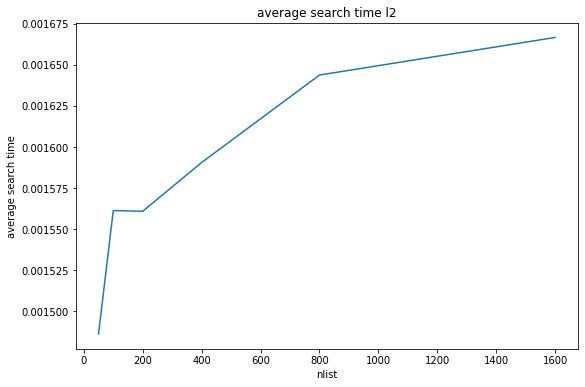

In [191]:
plt.figure(1)
fig, ax = plt.subplots(figsize=(9, 6))
search_time_array = []
for i in list(faiss_l2['nlist'].unique()):
    search_time_array.append(faiss_l2[faiss_l2['nlist']==i]['search_time'].mean())
ax.plot(list(faiss_l2['nlist'].unique()),search_time_array)
plt.title('average search time l2')
plt.ylabel('average search time')
plt.xlabel('nlist')
plt.show()

<Figure size 432x288 with 0 Axes>

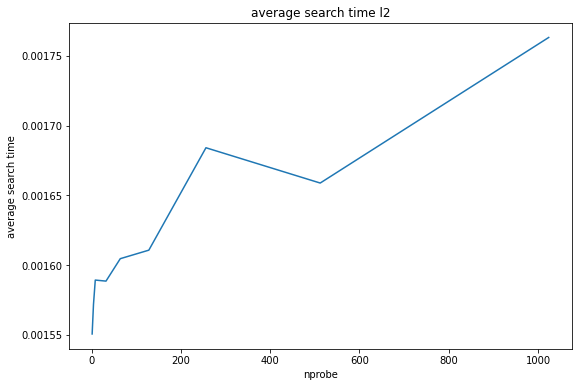

In [190]:
plt.figure(1)
fig, ax = plt.subplots(figsize=(9, 6))
search_time_array = []
for i in list(faiss_l2['nprobe'].unique()):
    search_time_array.append(faiss_l2[faiss_l2['nprobe']==i]['search_time'].mean())
ax.plot(list(faiss_l2['nprobe'].unique()),search_time_array)
plt.title('average search time l2')
plt.ylabel('average search time')
plt.xlabel('nprobe')
plt.show()

<Figure size 432x288 with 0 Axes>

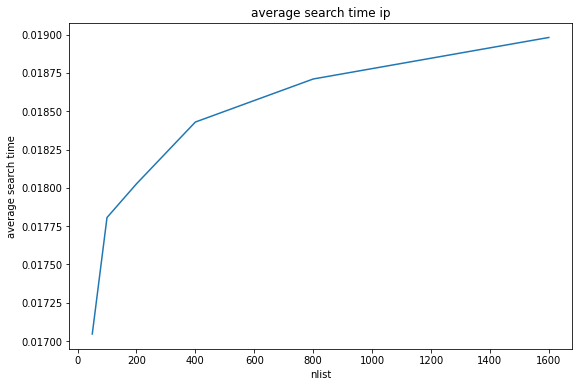

In [189]:
plt.figure(1)
fig, ax = plt.subplots(figsize=(9, 6))
search_time_array = []
for i in list(faiss_ip['nlist'].unique()):
    search_time_array.append(faiss_ip[faiss_ip['nlist']==i]['search_time'].mean())
ax.plot(list(faiss_ip['nlist'].unique()),search_time_array)
plt.title('average search time ip')
plt.ylabel('average search time')
plt.xlabel('nlist')
plt.show()

<Figure size 432x288 with 0 Axes>

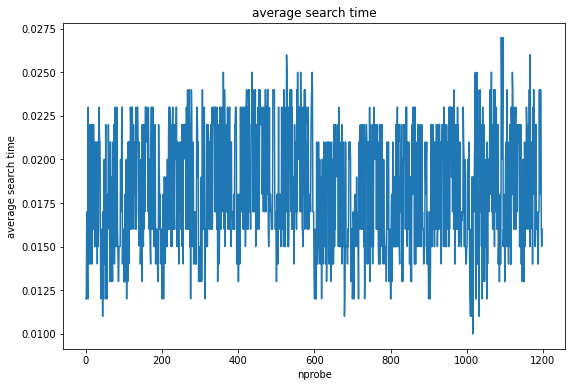

In [175]:
plt.figure(1)
fig, ax = plt.subplots(figsize=(9, 6))
search_time_array = []
for i in list(faiss_ip['nprobe'].unique()):
    search_time_array.extend(faiss_ip[faiss_ip['nprobe']==i]['search_time'])
ax.plot(list(search_time_array))
plt.title('average search time')
plt.ylabel('average search time')
plt.xlabel('nprobe')
plt.show()

<Figure size 432x288 with 0 Axes>

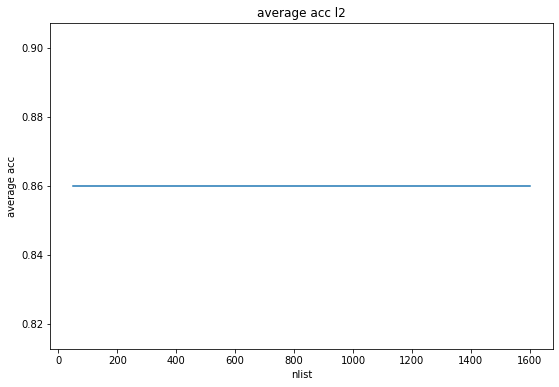

In [187]:
plt.figure(1)
fig, ax = plt.subplots(figsize=(9, 6))
search_time_array = []
for i in list(faiss_l2['nlist'].unique()):
    search_time_array.append(faiss_l2[faiss_l2['nlist']==i]['acc'].max())
ax.plot(list(faiss_l2['nlist'].unique()),search_time_array)
plt.title('average acc l2')
plt.ylabel('average acc')
plt.xlabel('nlist')
plt.show()

<Figure size 432x288 with 0 Axes>

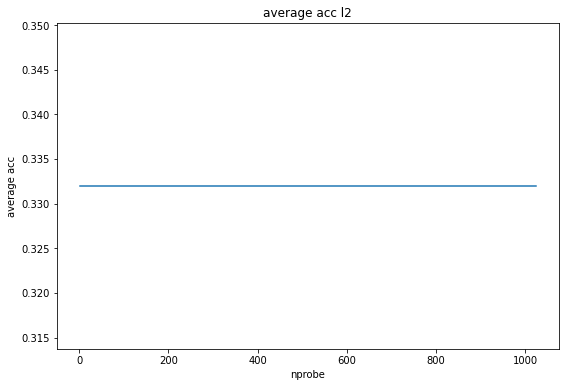

In [188]:
plt.figure(1)
fig, ax = plt.subplots(figsize=(9, 6))
search_time_array = []
for i in list(faiss_l2['nprobe'].unique()):
    search_time_array.append(faiss_l2[faiss_l2['nprobe']==i]['acc'].mean())
ax.plot(list(faiss_l2['nprobe'].unique()),search_time_array)
plt.title('average acc l2')
plt.ylabel('average acc')
plt.xlabel('nprobe')
plt.show()

In [222]:
nprobe_df = faiss_l2[faiss_l2['nprobe']==i]
nprobe_df[nprobe_df['nlist']==1600]

,testing_image,nlist,nprobe,time_taken,output_indices,acc,index_time,search_time
3800,../geological_similarity/schist/TEJ1Y.jpg,1600.0,1024.0,NaN,[29065 28259 25578 26318 25975 28953 26255 288...,0.42,0.528003,0.001002
3801,../geological_similarity/marble/13P1E.jpg,1600.0,1024.0,NaN,[10152 13203 13641 13701 11430 13093 11181 144...,0.48,0.528003,0.001996
3802,../geological_similarity/andesite/RRGXD.jpg,1600.0,1024.0,NaN,[3818 573 4126 2710 1118 1109 1115 4373 4813 ...,0.10,0.528003,0.001999
3803,../geological_similarity/schist/PEVYX.jpg,1600.0,1024.0,NaN,[28534 26574 25910 9124 28661 26808 29545 298...,0.14,0.528003,0.001999
3804,../geological_similarity/schist/66ZT7.jpg,1600.0,1024.0,NaN,[25850 28865 28430 28950 29345 29614 25049 293...,0.22,0.528003,0.001001
...,...,...,...,...,...,...,...,...
3895,../geological_similarity/schist/4CEIR.jpg,1600.0,1024.0,NaN,[25598 28136 29306 26652 25780 29406 26087 292...,0.48,0.528003,0.002001
3896,../geological_similarity/marble/WR9FH.jpg,1600.0,1024.0,NaN,[14560 11490 14105 11939 10430 10469 14868 139...,0.10,0.528003,0.001003
3897,../geological_similarity/marble/TCUV3.jpg,1600.0,1024.0,NaN,[14135 13689 11665 14332 14868 11465 14857 101...,0.20,0.528003,0.000968
3898,../geological_similarity/rhyolite/N7T32.jpg,1600.0,1024.0,NaN,[23299 20803 24562 24802 21018 20641 20852 237...,0.12,0.528003,0.001963


<Figure size 432x288 with 0 Axes>

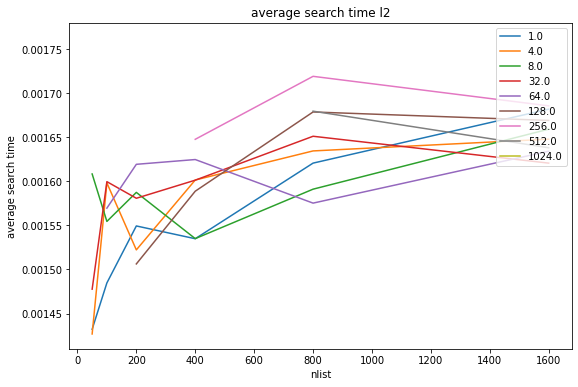

In [231]:
plt.figure(1)
fig, ax = plt.subplots(figsize=(9, 6))
for i in list(faiss_l2['nprobe'].unique()):
    nprobe_df = faiss_l2[faiss_l2['nprobe']==i]
    accuracy_array = []
    for j in list(nprobe_df['nlist'].unique()):
        accuracy_array.append(nprobe_df[nprobe_df['nlist']==j]['search_time'].mean())
        # ax.plot(list(nprobe_df['nlist'].unique()),nprobe_df[nprobe_df['nlist']==j]['acc'])
    ax.plot(list(nprobe_df['nlist'].unique()),accuracy_array)
plt.title('average search time l2')
plt.ylabel('average search time')
plt.xlabel('nlist')
plt.legend(list(faiss_l2['nprobe'].unique()), loc='upper right')
plt.show()

<Figure size 432x288 with 0 Axes>

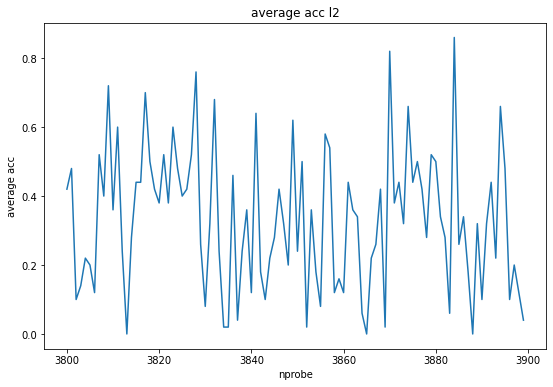

In [223]:
plt.figure(1)
fig, ax = plt.subplots(figsize=(9, 6))
search_time_array = []
ax.plot(nprobe_df[nprobe_df['nlist']==1600]['acc'])
plt.title('average acc l2')
plt.ylabel('average acc')
plt.xlabel('nprobe')
plt.show()